In [2]:
#Y=beta0 + beta1X1 + .... betanXn
#X = input var
#Y = output var
'''
The dimension of 
Y is px1
X is nxp
B is nx1
So,
For Y = BX, we need to make the dimensions in order. ie we have
to take transpose of X in order to do the multiplication.
So the dot product of np is used which does that for us.
There is a proof of how to solve it as we just cannot transpose
a matrix


'''

# Y = BetaT * X
# Beta = [beta0 beta1 beta2 ... betaN] (Transpose)


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
data=pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [23]:
data=(data-data.mean())/data.std()
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,-0.874879,-1.072228,2.403781,2.053562
1,-0.874879,-1.072228,0.284751,0.117388
2,-0.874879,-1.072228,1.716602,0.433159
3,-0.874879,-1.072228,0.391524,-0.007258
4,-0.874879,-1.072228,1.486630,2.552148


In [24]:
gender=data['Gender'].values
headSize=data['Head Size(cm^3)'].values
brainW=data['Brain Weight(grams)'].values

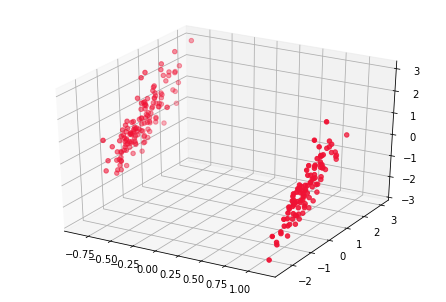

In [25]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(gender, headSize, brainW, color='#ef1234')
plt.show()

In [26]:
val_count=len(gender)


In [50]:
x0=np.ones(val_count)
X=np.array([x0,brainW, headSize]).T

Y=np.array([gender])
B=np.array([0,0,0])

In [78]:
def cost_function(X,Y,B):
    m=len(Y)
    J=np.sum((X.dot(B)-Y)**2)/2*val_count
    return J

In [79]:
print(X.shape)
print(Y.shape)
print(B.shape)

(237, 3)
(1, 237)
(3,)


In [80]:
print(cost_function(X,Y,B))

27965.999999999945


In [83]:
#As cost function is huge now we will apply GD

def gradient_descent(X,Y,B,alpha,iterations):
    all_costs=[0]*iterations
    
    for iteration in range(iterations):
        print("shape of X: ",X.shape)
        print("shape of B: ",B.shape)
        
        h=X.dot(B)
        
        print("shape of h: ",h.shape)
        
        loss=h-Y
        print("shape of Y: ",Y.shape)
        print("shape of loss: ",loss.shape)
        print("shape of X.T: ",X.T.shape)
        gradient=X.T.dot(loss)/val_count
        
        B=B-alpha*gradient
        cost=cost_function(X,Y,B)
        all_costs[iteration]=cost
        
    return B, all_costs
        

In [84]:
alpha=0.0001
B_new, all_costs=gradient_descent(X,Y,B,alpha,10000)
print(B_new)
print(all_costs[-1])

shape of X:  (237, 3)
shape of B:  (3,)
shape of h:  (237,)
shape of Y:  (1, 237)
shape of loss:  (1, 237)
shape of X.T:  (3, 237)


ValueError: shapes (3,237) and (1,237) not aligned: 237 (dim 1) != 1 (dim 0)